# Analysis of @realDonaldTrump Twitter Account

## This notebook follows a typical pattern for exploring a database.
* The database is first loaded into a data structure called a Pandas DataFrame followed by some preliminary data exploration.
* The database is then cleaned and the datatypes are changed into forms that allow for more easy data extraction.
* An analysis of the data is then performed using visualization tools when appropriate.

### When using the programming language Python for data science, numpy, pandas and matplotlib form the core external libraries that must first be imported.  Seaborn is a Python visualization library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime
import seaborn as sns
sns.set()
%matplotlib inline

### The following will set the size for all figures below.

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)

### Let's first take a look at the csv file we will use.  Note, UNIX commands can be executed in a notebook cell with the use of a preceding (!).

In [3]:
!head -4 ./data_file/trump_tweets.csv

source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
Twitter for iPhone,We are delivering HISTORIC TAX RELIEF for the American people!#TaxCutsandJobsAct https://t.co/lLgATrCh5o,12-20-2017 18:09:44,2395,7523,false,943543958730309633
Twitter for iPhone,Together we are MAKING AMERICA GREAT AGAIN! https://t.co/47k9i4p3J2,12-20-2017 17:30:26,4636,17361,false,943534069287194626
Twitter for iPhone,I would like to congratulate @SenateMajLdr on having done a fantastic job both strategically &amp; politically on the passing in the Senate of the MASSIVE TAX CUT &amp; Reform Bill. I could have not asked for a better or more talented partner. Our team will go onto many more VICTORIES!,12-20-2017 16:39:04,6814,29831,false,943521141062238208


### Credit to Brendan Brown for scraping the Twitter account of @realDonaldTrump http://www.trumptwitterarchive.com/.  We can display a website in the notebook with the IFrame function.

In [4]:
from IPython.display import IFrame

In [5]:
IFrame('http://www.trumptwitterarchive.com/', width=700, height=350)

### It's simple to read a csv file into a Pandas DataFrame (which can be thought of as an in-memory spreadsheet with rows and columns).   

In [6]:
tweets = pd.read_csv('./data_file/trump_tweets.csv', dtype={'id_str': str})

## Typically data must first be cleaned before an analysis can be performed.

### It's helpful to first take a look at the DataFrame with the DataFrame.head() command.

In [7]:
tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,We are delivering HISTORIC TAX RELIEF for the ...,12-20-2017 18:09:44,2395.0,7523,false,943543958730309633
1,Twitter for iPhone,Together we are MAKING AMERICA GREAT AGAIN! ht...,12-20-2017 17:30:26,4636.0,17361,false,943534069287194626
2,Twitter for iPhone,I would like to congratulate @SenateMajLdr on ...,12-20-2017 16:39:04,6814.0,29831,false,943521141062238208
3,Twitter for iPhone,The Tax Cuts are so large and so meaningful an...,12-20-2017 14:32:51,9934.0,40677,false,943489378462130176
4,Twitter for iPhone,The United States Senate just passed the bigge...,12-20-2017 06:09:06,25543.0,101599,false,943362605258813441


### The DataFrame.shape attribute provides the number of rows and columns.

In [8]:
tweets.shape

(29902, 7)

### A few columns contain data fields that could not be interpreted properly, in this case we will simply drop rows that contain these data fields.

In [9]:
tweets.isnull().sum()

source            0
text              1
created_at        4
retweet_count     4
favorite_count    4
is_retweet        4
id_str            7
dtype: int64

In [10]:
tweets.dropna(inplace=True)

### There are now 7 fewer rows.

In [11]:
tweets.shape

(29895, 7)

### An examination of the column data types (object typically = string).

In [12]:
tweets.dtypes

source             object
text               object
created_at         object
retweet_count     float64
favorite_count     object
is_retweet         object
id_str             object
dtype: object

### Change columns retweet_count and favorite_count to the integer data type.

In [13]:
tweets['retweet_count'] = tweets.retweet_count.astype(int)

In [14]:
tweets['favorite_count'] = tweets.favorite_count.astype(int)

### Change column is_retweet to the boolean data type ('false' and 'true' are python strings, not booleans).

In [15]:
tweets['is_retweet'] = tweets.is_retweet.map({'false': False, 'true': True})

### Change the created_at column to pandas datetime objects to allow for simple datetime parsing.

In [16]:
tweets['created_at'] = pd.to_datetime(tweets.created_at, utc=True).dt.tz_localize('UTC')

### Add the column US/Eastern which is the created_at column (in UTC time) converted to US/Eastern time (which also takes into account Daylight Savings Time conversions).

In [17]:
tweets['US/Eastern'] = tweets.created_at.dt.tz_convert('US/Eastern')

### Reexamine the DataFrame data types.

In [18]:
tweets.dtypes

source                                object
text                                  object
created_at               datetime64[ns, UTC]
retweet_count                          int64
favorite_count                         int64
is_retweet                              bool
id_str                                object
US/Eastern        datetime64[ns, US/Eastern]
dtype: object

### A quick look at the device/source used to produce each tweet (note the preponderance of tweets produced from an Android device, remember, the account was created in 2009).

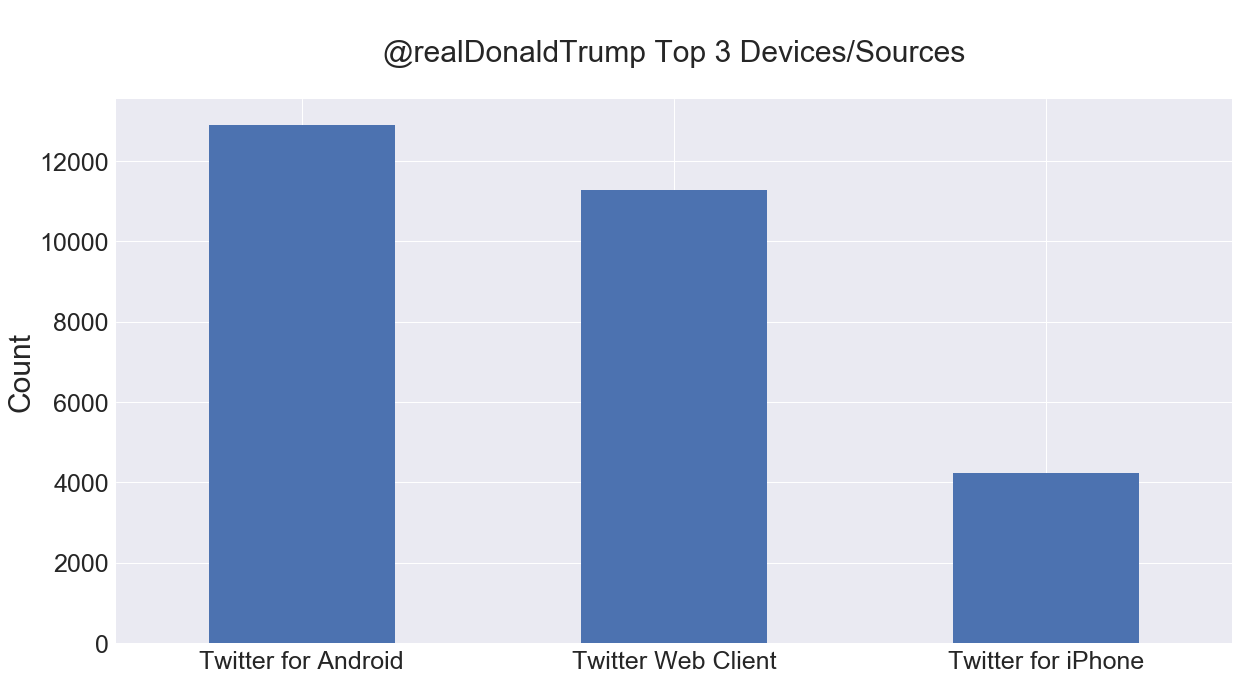

In [19]:
tweets.source.value_counts().iloc[:3].plot(kind='bar', fontsize=25, rot=0)
plt.ylabel('Count', size=30)
plt.title("\n@realDonaldTrump Top 3 Devices/Sources\n", size=30);

## An analysis of tweets in a given year containing key words or phrases.

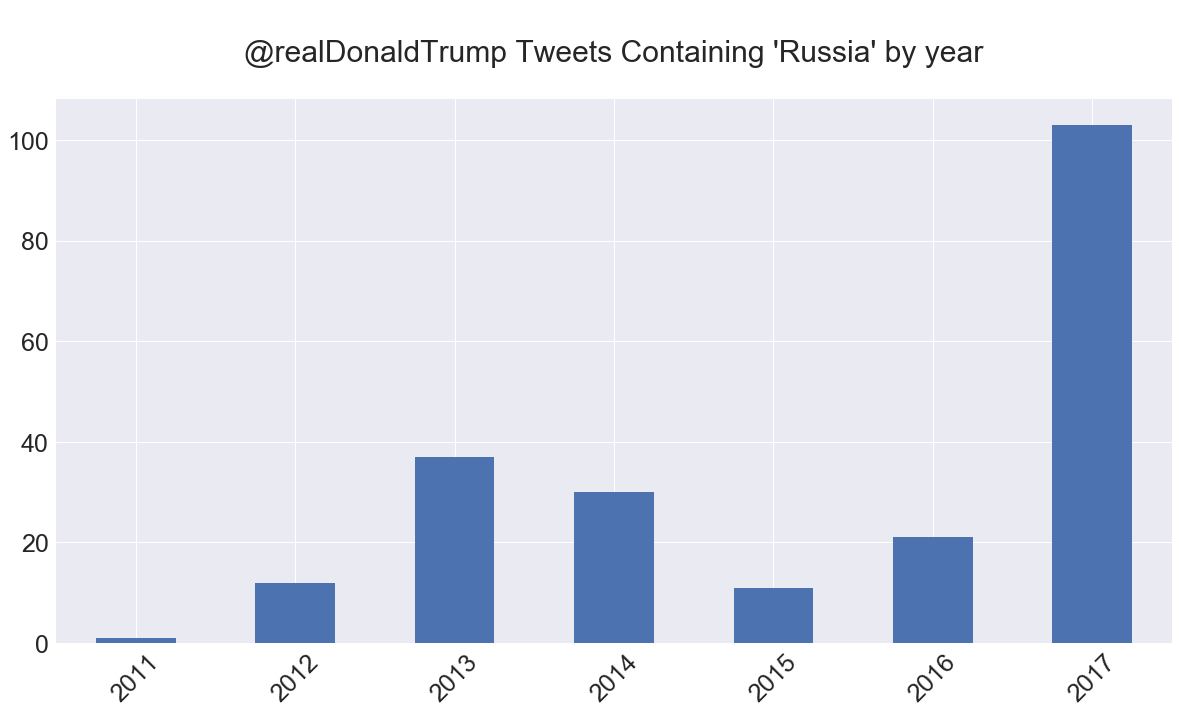

In [20]:
russia_filter = tweets.text.str.contains('russia', case=False)
tweets[russia_filter].created_at.dt.year.value_counts().sort_index().plot(kind='bar', 
    rot=45, fontsize=25)
plt.title("\n@realDonaldTrump Tweets Containing 'Russia' by year\n", size=30);

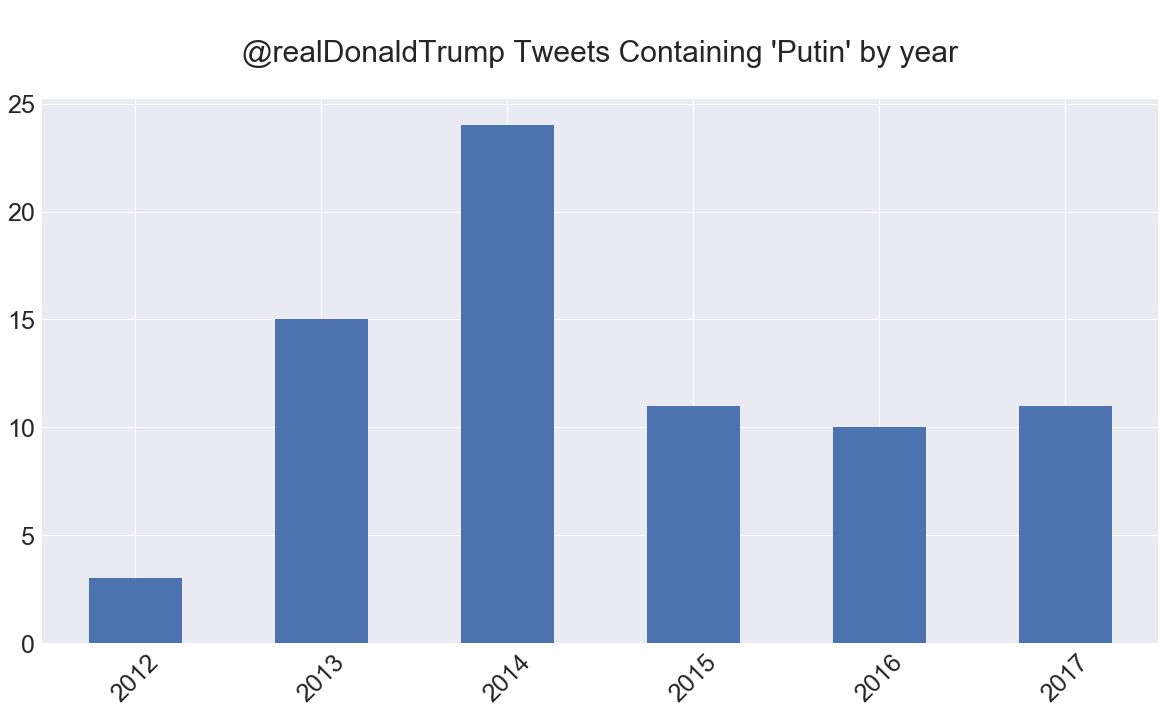

In [21]:
putin_filter = tweets.text.str.contains('putin', case=False)
tweets[putin_filter].created_at.dt.year.value_counts().sort_index().plot(kind='bar', 
    rot=45, fontsize=25)
plt.title("\n@realDonaldTrump Tweets Containing 'Putin' by year\n", size=30);

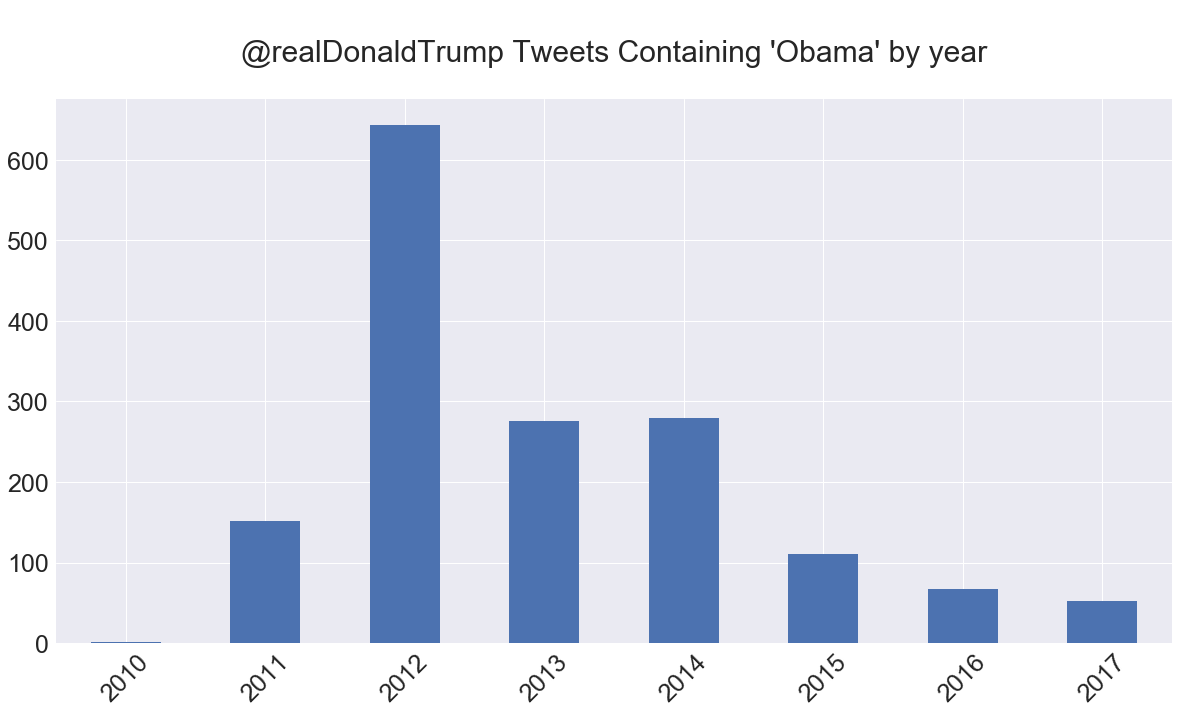

In [22]:
obama_filter = tweets.text.str.contains('obama +', case=False)
tweets[obama_filter].created_at.dt.year.value_counts().sort_index().plot(kind='bar', 
    rot=45, fontsize=25)
plt.title("\n@realDonaldTrump Tweets Containing 'Obama' by year\n", size=30);

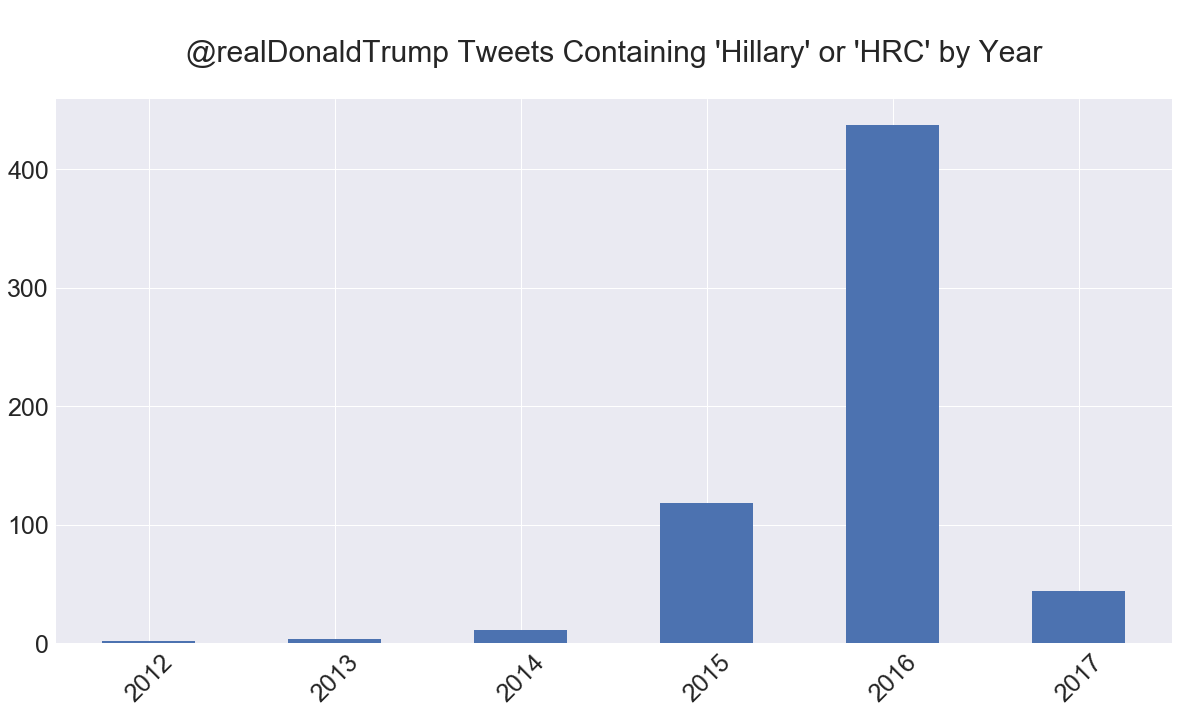

In [23]:
pattern = '(hillary )|(hrc)'
hillary_filter = tweets.text.str.lower().str.count(pattern).astype(bool)
tweets[hillary_filter].created_at.dt.year.value_counts().sort_index().plot(kind='bar', 
    rot=45, fontsize=25);
plt.title("\n@realDonaldTrump Tweets Containing 'Hillary' or 'HRC' by Year\n", size=30);

### We will create 4 separate DataFrames dividing tweets into the following periods: 1. pre-candidacy 2. candidacy (6/16/2015 - 11/8/2016) 3. transition (11/8/2016-1/20/2017) and 4. presidency (1/20/2017-?).

In [24]:
inauguration = pd.to_datetime('1/20/2017')

In [25]:
start_of_candidacy = pd.to_datetime('6/16/2015')

In [26]:
election_day = pd.to_datetime('11/8/2016')

In [27]:
inauguration_day = pd.to_datetime('1/20/2017')

In [28]:
pre_candidacy_tweets = tweets[tweets['US/Eastern'] < start_of_candidacy]

In [29]:
candidacy_tweets = tweets[(tweets['US/Eastern'] >= start_of_candidacy) & (tweets['US/Eastern'] <= election_day)]

In [30]:
transition_tweets = tweets[(tweets['US/Eastern'] > election_day) & (tweets['US/Eastern'] < inauguration_day)]

In [31]:
presidency_tweets = tweets[tweets['US/Eastern'] >= inauguration_day]

### The number of tweets in each category.

In [32]:
pre_candidacy_tweets.shape[0]

20063

In [33]:
candidacy_tweets.shape[0]

7057

In [34]:
transition_tweets.shape[0]

388

In [35]:
presidency_tweets.shape[0]

2387

## An analysis of tweets by hour of the day.  Note the shift in time for tweets from pre-candidacy to presidency.

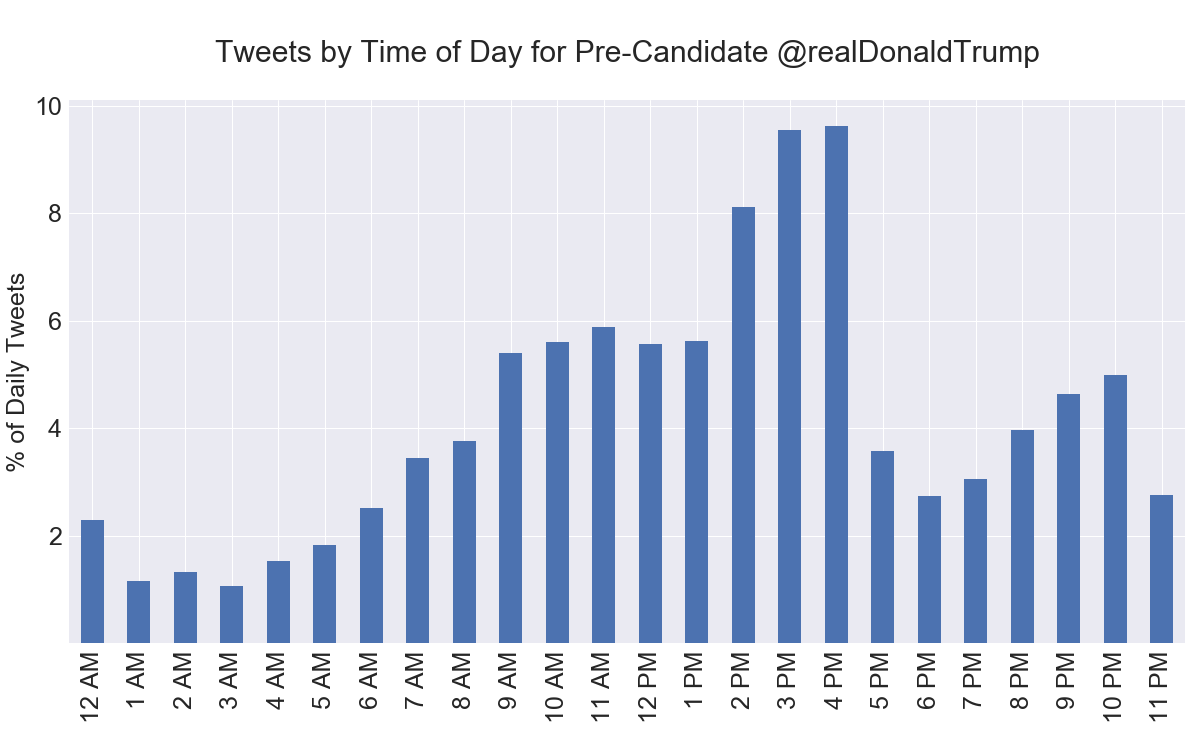

In [36]:
hours = [re.sub('^0', '', datetime.time(i).strftime('%I %p')) for i in range(24)]
pre_candidacy_tweets['US/Eastern'].dt.hour.value_counts(normalize=True).sort_index().plot(kind='bar',
            fontsize=25)
plt.xticks([i for i in range(24)], hours, size=25)
plt.yticks(np.linspace(0.02, 0.10, 5), (pd.Series(np.linspace(0.02, 0.10, 5)) * 100).astype(int))
plt.ylabel('% of Daily Tweets', size=25)
plt.title('\nTweets by Time of Day for Pre-Candidate @realDonaldTrump\n', size=30);

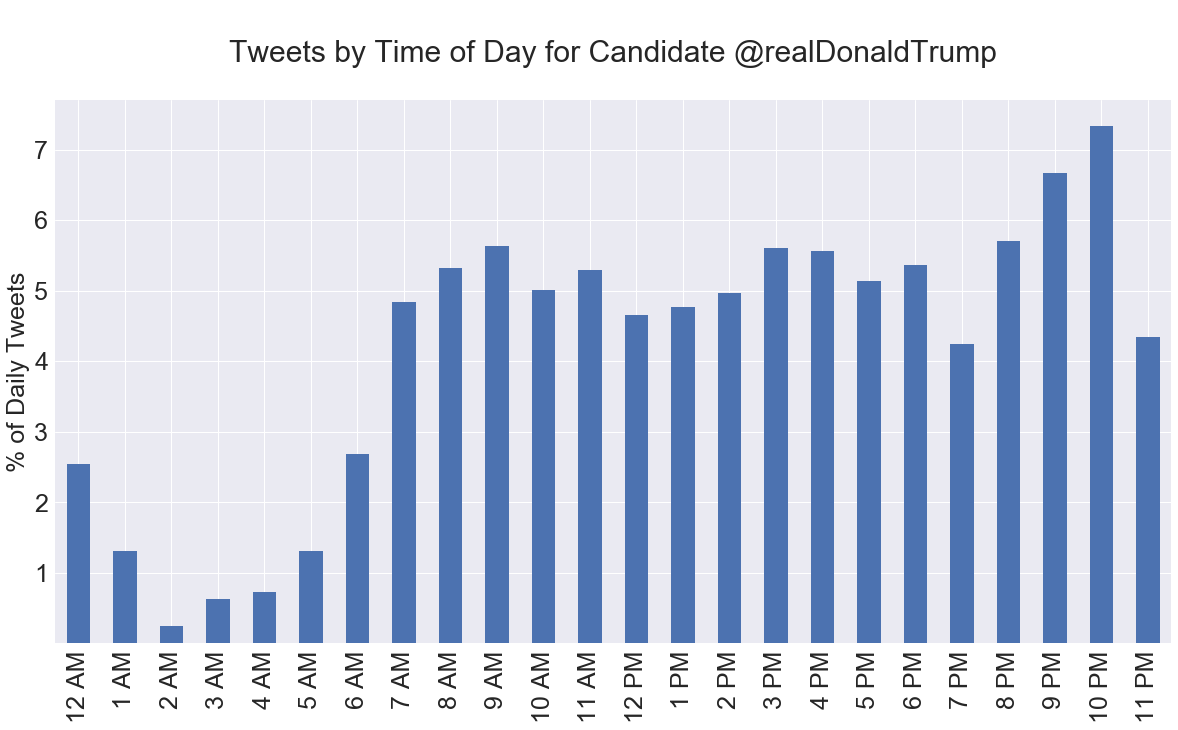

In [37]:
candidacy_tweets['US/Eastern'].dt.hour.value_counts(normalize=True).sort_index().plot(kind='bar',
            fontsize=25)
plt.xticks([i for i in range(24)], hours, size=25)
plt.yticks(np.linspace(0.01, 0.07, 7), (pd.Series(np.linspace(0.01, 0.07, 7)) * 100).astype(int))
plt.ylabel('% of Daily Tweets', size=25)
plt.title('\nTweets by Time of Day for Candidate @realDonaldTrump\n', size=30);

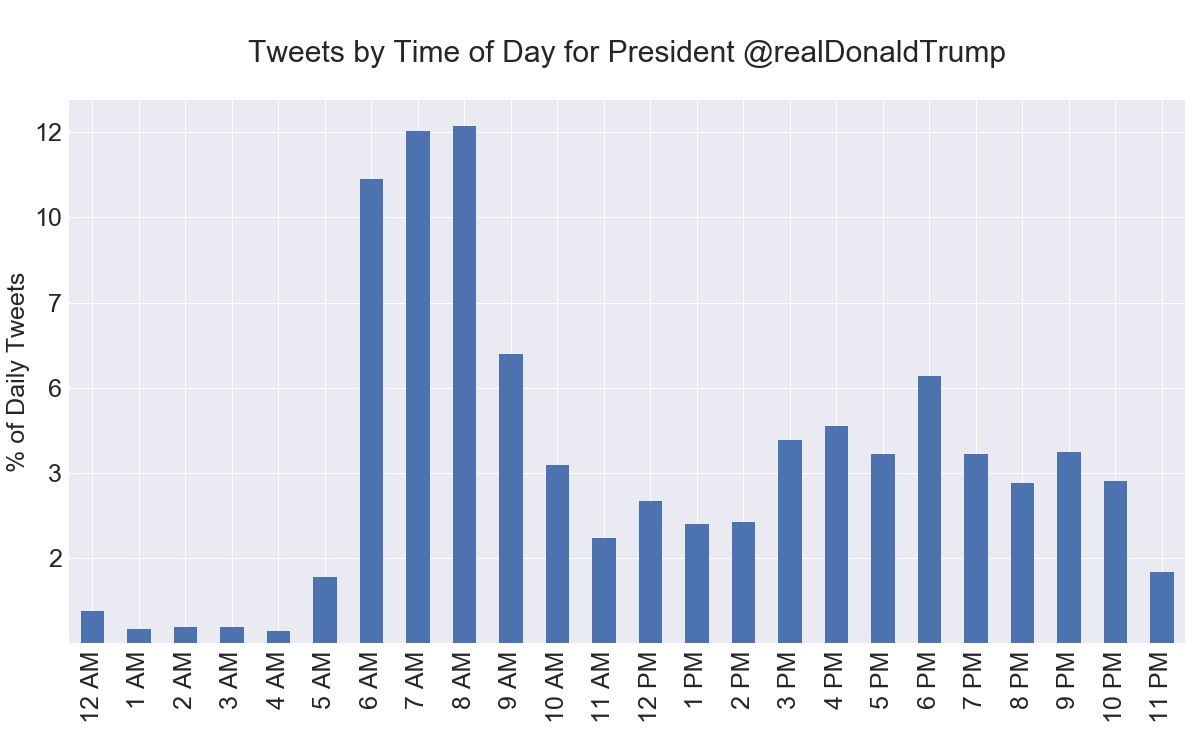

In [38]:
presidency_tweets['US/Eastern'].dt.hour.value_counts(normalize=True).sort_index().plot(kind='bar',
            fontsize=25)
plt.xticks([i for i in range(24)], hours, size=25)
plt.yticks(np.linspace(0.02, 0.12, 6), (pd.Series(np.linspace(0.02, 0.12, 6)) * 100).astype(int))
plt.ylabel('% of Daily Tweets', size=25)
plt.title('\nTweets by Time of Day for President @realDonaldTrump\n', size=30);

## An analysis of tweets by day of the week.

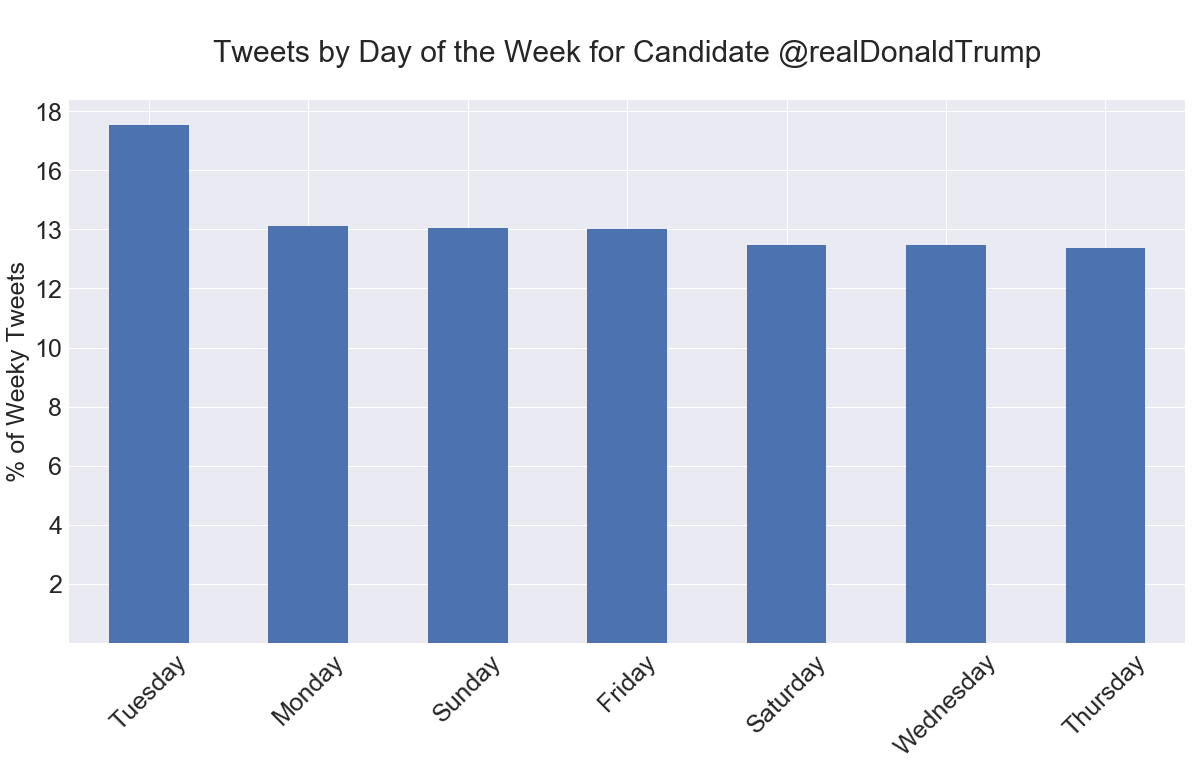

In [39]:
candidacy_tweets['US/Eastern'].dt.weekday_name.value_counts(normalize=True).plot(kind='bar',
        fontsize=25, rot=45)
plt.yticks(np.linspace(0.02, 0.18, 9), (pd.Series(np.linspace(0.02, 0.18, 9)) * 100).astype(int))
plt.ylabel('% of Weeky Tweets', size=25)
plt.title('\nTweets by Day of the Week for Candidate @realDonaldTrump\n', size=30);

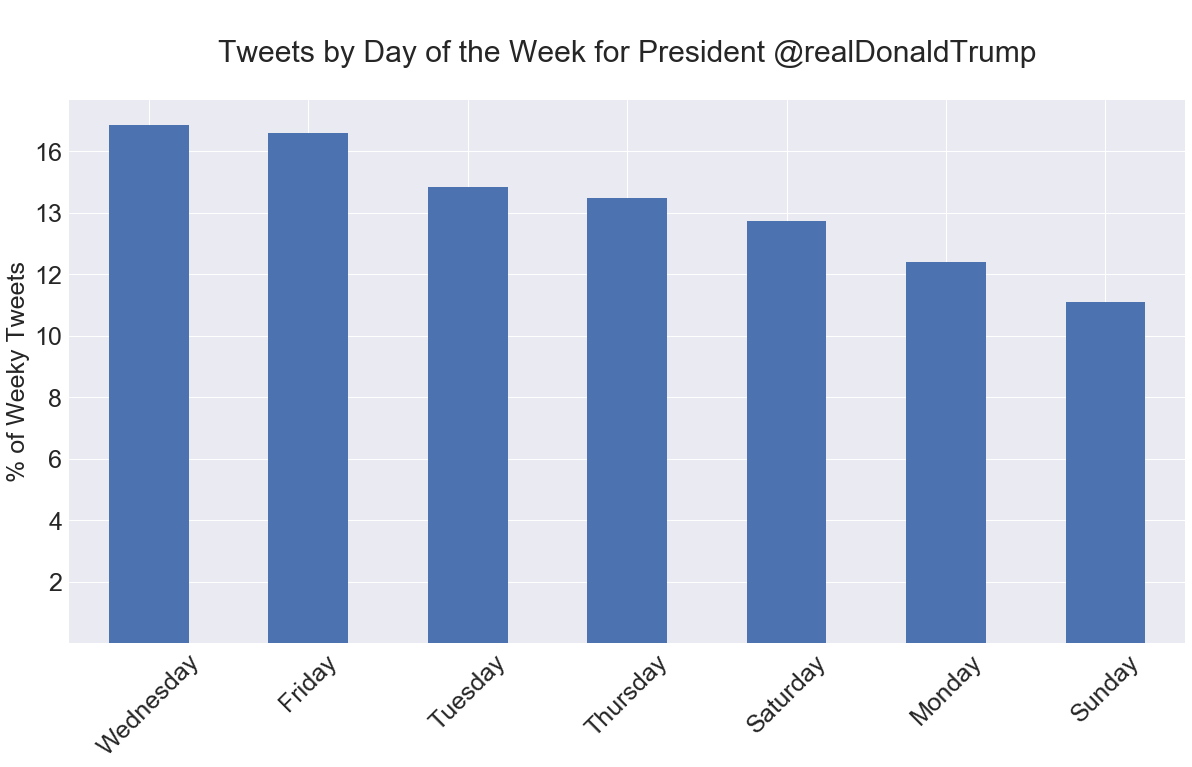

In [40]:
presidency_tweets['US/Eastern'].dt.weekday_name.value_counts(normalize=True).plot(kind='bar',
        fontsize=25, rot=45)
plt.yticks(np.linspace(0.02, 0.16, 8), (pd.Series(np.linspace(0.02, 0.16, 8)) * 100).astype(int))
plt.ylabel('% of Weeky Tweets', size=25)
plt.title('\nTweets by Day of the Week for President @realDonaldTrump\n', size=30);

## Tweet counts with key words or phrases.

In [41]:
vaccine_filter = tweets.text.str.contains('vaccin', case=False)
print(f"There are {vaccine_filter.sum()} tweets with some variation of 'vaccin'(including vaccine(s), vaccination(s)).")

There are 30 tweets with some variation of 'vaccin'(including vaccine(s), vaccination(s)).


In [42]:
global_warming_filter = tweets.text.str.contains('global ?warming', case=False)
print(f"There are {global_warming_filter.sum()} tweets with some variation of 'global warming'.")

There are 106 tweets with some variation of 'global warming'.


In [43]:
china_filter = tweets.text.str.contains('china', case=False)
print(f"There are {china_filter.sum()} tweets with some variation of 'China'.")

There are 448 tweets with some variation of 'China'.


In [44]:
iraq_filter = tweets.text.str.contains('iraq', case=False)
print(f"There are {iraq_filter.sum()} tweets with some variation of 'Iraq'.")

There are 161 tweets with some variation of 'Iraq'.


In [45]:
fake_news_filter = tweets.text.str.contains('fake ?news', case=False)
print(f"There are {fake_news_filter.sum()} tweets with some variation of 'fake news'.")

There are 165 tweets with some variation of 'fake news'.


In [46]:
merry_christmas_filter = tweets.text.str.contains('merry ?christmas', case=False)
print(f"There are {merry_christmas_filter.sum()} tweets with some variation of 'Merry Christmas'.")

There are 30 tweets with some variation of 'Merry Christmas'.


## Now if an amatuer hacker can perform this type of analysis, imagine what a foreign intelligence service can do.